In [1]:
import pandas as pd
import numpy as np

In [2]:
# installing pyorange
!pip install pyorange

In [3]:
# Importing the data
data=pd.read_csv(r"C:\Users\ssatish\PyOrange\house_price_dataset.csv")

In [4]:
from pyorange.utils import version
version()

'1.0.0'

In [5]:
# converting to dataframe
dataset=pd.DataFrame(data)

In [6]:
# Number of Rows and columns in data set
dataset.shape

(1000, 8)

In [7]:
# Reading top five records in data set
dataset.head()

,Unnamed: 0,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,37,Bommanahalli,3,1,3000,1,3,28000
1,43,Bommanahalli,3,1,1650,10,0,18000
2,12,Whitefield,2,0,1000,5,3,16400
3,8,Whitefield,3,0,1600,1,9,27000
4,9,Whitefield,2,1,1200,5,1,20000


In [8]:
# Reading bottom five records
dataset.tail()

,Unnamed: 0,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
995,48,Bommanahalli,3,1,1460,1,2,25000
996,0,Whitefield,3,0,2100,1,7,28000
997,42,Bommanahalli,2,0,1033,5,0,16500
998,39,Bommanahalli,3,0,1500,10,1,22000
999,3,Whitefield,3,1,1768,5,11,30000


In [9]:
# Displaying the column names
dataset.columns

Index(['Unnamed: 0', 'Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)',
       'Floor', 'Price'],
      dtype='object')

In [10]:
# checking null values
dataset.isnull().sum()

Unnamed: 0    0
Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [11]:
# Removing the unwanted column
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [12]:
# Renaming the columns
data=data.rename(columns={'Sq.ft':'Square_feet','Old(years)':'Old_years'})
data.head()

,Location,BHK,Furnishing,Square_feet,Old_years,Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [13]:
# checking the unique values in Furnishing column
data['Furnishing'].unique()

array([1, 0], dtype=int64)

In [14]:
# replacing labels with categories inside the furnshing column
data['Furnishing'] = data["Furnishing"].map({1:"Yes",0:"No"})
print(data)

         Location  BHK Furnishing  Square_feet  Old_years  Floor  Price
0    Bommanahalli    3        Yes         3000          1      3  28000
1    Bommanahalli    3        Yes         1650         10      0  18000
2      Whitefield    2         No         1000          5      3  16400
3      Whitefield    3         No         1600          1      9  27000
4      Whitefield    2        Yes         1200          5      1  20000
..            ...  ...        ...          ...        ...    ...    ...
995  Bommanahalli    3        Yes         1460          1      2  25000
996    Whitefield    3         No         2100          1      7  28000
997  Bommanahalli    2         No         1033          5      0  16500
998  Bommanahalli    3         No         1500         10      1  22000
999    Whitefield    3        Yes         1768          5     11  30000

[1000 rows x 7 columns]


In [15]:
# Finding the number of missing values
data.isnull().sum()

Location       0
BHK            0
Furnishing     0
Square_feet    0
Old_years      0
Floor          0
Price          0
dtype: int64

In [16]:
# Displaying the type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     1000 non-null   object
 1   BHK          1000 non-null   int64 
 2   Furnishing   1000 non-null   object
 3   Square_feet  1000 non-null   int64 
 4   Old_years    1000 non-null   int64 
 5   Floor        1000 non-null   int64 
 6   Price        1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [17]:
# Displaying the summary of data
data.describe()

,BHK,Square_feet,Old_years,Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,491.272535,3.048845,3.245197,7706.410627
min,2.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,3155.000000,10.000000,13.000000,45000.000000


In [18]:
# Importing module and initializing setup
from pyorange.regression import *
reg1 = setup(data = data, 
             target = 'Price',
             train_size = 0.8
             )
#reg1 = setup(data = result, target = 'Price',
#                feature_selection = True,
#               normalize = True,
#               ignore_low_variance = True,
#               remove_multicollinearity = True,
#               multicollinearity_threshold = 0.9)

,Description,Value
0,session_id,2136
1,Target,Price
2,Original Data,"(1000, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(800, 19)"


In [19]:
# displaying all the available regression models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [20]:
# comparing all models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.0000,200.0000,4.4721,1.0000,0.0002,0.0001,0.0310
rf,Random Forest Regressor,0.2550,8.8050,1.3256,1.0000,0.0001,0.0000,0.2180
et,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1920
catboost,CatBoost Regressor,0.7410,0.9961,0.9804,1.0000,0.0001,0.0000,2.1270
xgboost,Extreme Gradient Boosting,0.0039,0.0000,0.0052,1.0000,0.0000,0.0000,0.3550
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0150
lightgbm,Light Gradient Boosting Machine,52.0299,12109.7303,101.4414,0.9998,0.0039,0.0021,0.1110
gbr,Gradient Boosting Regressor,319.6005,182536.0347,422.0782,0.9968,0.0203,0.0150,0.0470
ada,AdaBoost Regressor,1443.2542,3049183.1032,1741.8631,0.9467,0.0807,0.0665,0.0470
lr,Linear Regression,2072.0364,7105257.8000,2655.9429,0.8760,0.1238,0.1015,1.1420


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
#training particular models for time consuming
best_model=compare_models(include = ['lr','dt','svm','ridge','rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0140
rf,Random Forest Regressor,0.2550,8.8050,1.3256,1.0000,0.0001,0.0000,0.2230
lr,Linear Regression,2072.0364,7105257.8000,2655.9429,0.8760,0.1238,0.1015,0.0150
ridge,Ridge Regression,2104.5834,7119480.5000,2658.5259,0.8757,0.1238,0.1024,0.0150
svm,Support Vector Regression,5899.4921,62155987.9264,7844.6869,-0.0477,0.3186,0.2543,0.0250


In [22]:
# getting the best model
final_best = finalize_model(best_model)

In [23]:
print(final_best)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2136, splitter='best')


In [24]:
tuned_best = tune_model(final_best,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [25]:
print(tuned_best)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.1, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2136, splitter='best')


In [26]:
# pulling trained scores
metrics_frame=pull()
print(metrics_frame)

      MAE  MSE  RMSE   R2  RMSLE  MAPE
0     0.0  0.0   0.0  1.0    0.0   0.0
1     0.0  0.0   0.0  1.0    0.0   0.0
2     0.0  0.0   0.0  1.0    0.0   0.0
3     0.0  0.0   0.0  1.0    0.0   0.0
4     0.0  0.0   0.0  1.0    0.0   0.0
5     0.0  0.0   0.0  1.0    0.0   0.0
6     0.0  0.0   0.0  1.0    0.0   0.0
7     0.0  0.0   0.0  1.0    0.0   0.0
8     0.0  0.0   0.0  1.0    0.0   0.0
9     0.0  0.0   0.0  1.0    0.0   0.0
Mean  0.0  0.0   0.0  1.0    0.0   0.0
SD    0.0  0.0   0.0  0.0    0.0   0.0


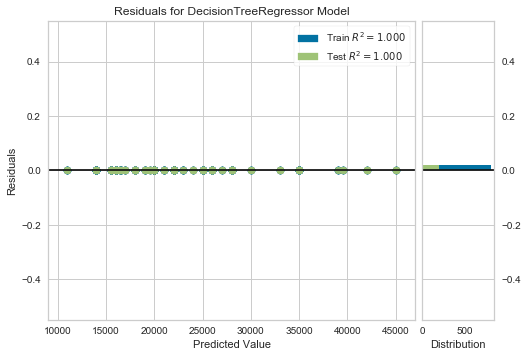

None


In [28]:
# plotting the model for evaluating the train and test scores
#plot_train_test=plot_model(tuned_best,save=True) # save =True , saves the file in png format in the current file folder
plot_train_test=plot_model(tuned_best)
print(plot_train_test)

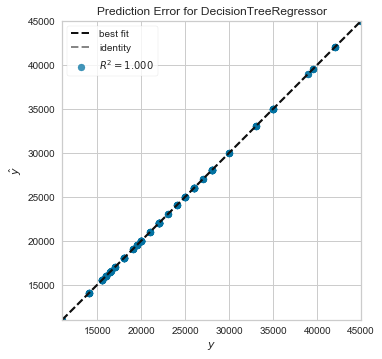

None


In [29]:
# plotting the regression line for the model
plot_regression_line = plot_model(tuned_best, plot = 'error')
print(plot_regression_line)

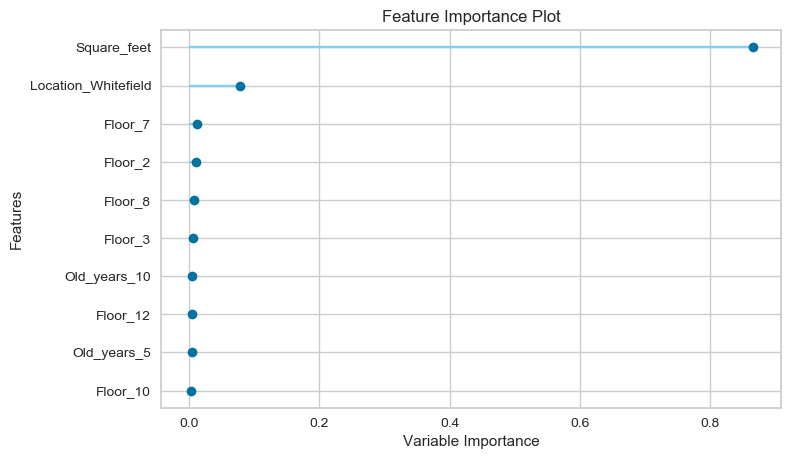

None


In [30]:
# plotting the feature Importance
plot_feature_importance = plot_model(tuned_best, plot='feature')
print(plot_feature_importance)

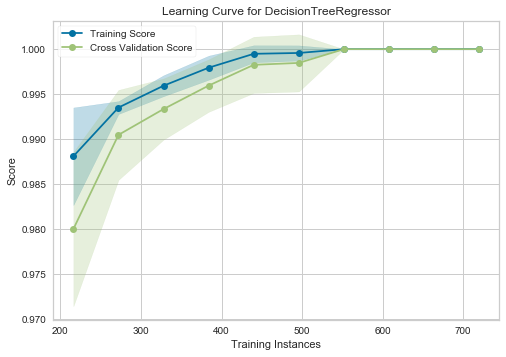

None


In [31]:
# plotting the learning curve
plot_learning_curve = plot_model(tuned_best, plot='learning')
print(plot_learning_curve)

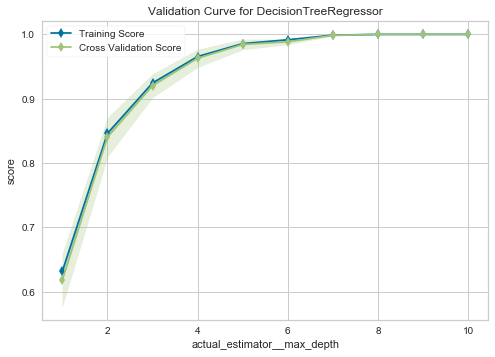

None


In [32]:
# plotting the feature Importance
plot_validation_curve = plot_model(tuned_best, plot='vc')
print(plot_validation_curve)

In [33]:
# plotting all the evaluated metrics for regression
evaluate_model(tuned_best);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
# predictions on hold-out set
best_pred_holdout = predict_model(tuned_best)
print(best_pred_holdout)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


     Square_feet  Location_Whitefield  BHK_3  Furnishing_Yes  Old_years_1  \
0         1870.0                  1.0    1.0             1.0          0.0   
1         1135.0                  0.0    0.0             0.0          0.0   
2         1744.0                  0.0    1.0             0.0          1.0   
3         1135.0                  0.0    0.0             0.0          0.0   
4         1089.0                  0.0    0.0             1.0          0.0   
..           ...                  ...    ...             ...          ...   
195       2200.0                  1.0    1.0             0.0          1.0   
196       1568.0                  1.0    0.0             0.0          1.0   
197       1600.0                  1.0    0.0             1.0          0.0   
198       1460.0                  0.0    1.0             1.0          1.0   
199        950.0                  0.0    0.0             0.0          0.0   

     Old_years_10  Old_years_5  Floor_0  Floor_1  Floor_10  ...  Floor_12  

In [35]:
# finalizing the best model
final_model = finalize_model(tuned_best)
print(final_model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.1, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2136, splitter='best')


In [37]:
# saving the model
save_model = save_model(final_model,'final_regression_model')
print(save_model)

Transformation Pipeline and Model Succesfully Saved
(Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=15, max_features=1.0,
                                

In [38]:
load_model = load_model('final_regression_model')
print(load_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=15, max_features=1.0,
                               

In [39]:
data.head()

,Location,BHK,Furnishing,Square_feet,Old_years,Floor,Price
0,Bommanahalli,3,Yes,3000,1,3,28000
1,Bommanahalli,3,Yes,1650,10,0,18000
2,Whitefield,2,No,1000,5,3,16400
3,Whitefield,3,No,1600,1,9,27000
4,Whitefield,2,Yes,1200,5,1,20000


In [40]:
# extracting 100 records for testing on new data
new_data=data.iloc[0:100,0:-1]
new_data.head()

,Location,BHK,Furnishing,Square_feet,Old_years,Floor
0,Bommanahalli,3,Yes,3000,1,3
1,Bommanahalli,3,Yes,1650,10,0
2,Whitefield,2,No,1000,5,3
3,Whitefield,3,No,1600,1,9
4,Whitefield,2,Yes,1200,5,1


In [41]:
# predictions on new dataset
pred_new = predict_model(load_model, data = new_data)
pred_new

,Location,BHK,Furnishing,Square_feet,Old_years,Floor,Label
0,Bommanahalli,3,Yes,3000,1,3,28000.0
1,Bommanahalli,3,Yes,1650,10,0,18000.0
2,Whitefield,2,No,1000,5,3,16400.0
3,Whitefield,3,No,1600,1,9,27000.0
4,Whitefield,2,Yes,1200,5,1,20000.0
...,...,...,...,...,...,...,...
95,Bommanahalli,2,No,1135,10,2,16000.0
96,Whitefield,3,No,2117,1,0,33000.0
97,Bommanahalli,2,No,950,5,1,14000.0
98,Bommanahalli,2,Yes,1300,5,3,20000.0


In [42]:
pred_new.to_csv(r'C:/Users/ssatish/PyOrange/predicted_house_prices.csv')